In [1]:
from src.data.data import *
from src.orcml import *
from src.plotting import *
from src.utils.graph_utils import *
from src.isorc import *
from src.utils.embeddings import *
from sklearn.manifold import TSNE
import torch
import torchvision
%load_ext autoreload

exp_params = {
    'mode': 'nbrs',
    'n_neighbors': 15,
    'epsilon': None,
    'lda': 0.01,
    'delta': 0.8
}

In [2]:
n_points = 2500
noise = 6.2
noise_thresh = 2.2

dataset_info = {
    'name': '3D_swiss_roll',
    'n_points': n_points,
    'noise': noise,
    'noise_thresh': noise_thresh
}

return_dict = swiss_roll(n_points=n_points, noise=noise, noise_thresh=noise_thresh, supersample=True, dim=3, hole=False)
swiss_roll_data, color, cluster, swiss_roll_supersample, subsample_indices = return_dict['data'], return_dict['color'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']

In [12]:
G = orcmanl.G.copy()
subG = nx.ego_graph(G, 1, radius=1)
# plot_graph_3D(swiss_roll_data, subG, title=None)
import networkit as nk
G_nk = nk.nxadapter.nx2nk(G)
print(list(G_nk.iterNeighbors(1)))
print(list(nk.graphtools.subgraphAndNeighborsFromNodes(G_nk, [1], True).iterNodes()))


[0, 782, 783, 2, 784, 785, 786, 4, 7, 9, 11, 787, 788, 789, 14]
[0, 1, 2, 4, 7, 9, 11, 14, 782, 783, 784, 785, 786, 787, 788, 789]


In [35]:
%autoreload 2
orcmanl = ORCManL(
    exp_params=exp_params,
    verbose=True,
    reattach=True,
    nbrhood_size=1
)
orcmanl.fit(swiss_roll_data)

nbrhood_size 1
Number of candidate edges: 4097, Number of edges in G': 22216
Shortcut Edge Detected: edge 387
 d_G'(x,y)/effective_eps: 33.25757171183067
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 457
 d_G'(x,y)/effective_eps: 14.858203910420748
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 601
 d_G'(x,y)/effective_eps: 25.276584074241136
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 644
 d_G'(x,y)/effective_eps: 33.16603296037654
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 645
 d_G'(x,y)/effective_eps: 34.003698853277314
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 722
 d_G'(x,y)/effective_eps: 28.07601337864953
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 804
 d_G'(x,y)/effective_eps: 23.809942542912808
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 811
 d_G'(x,y)/effective_eps: 23.552

In [38]:
plot_graph_3D(swiss_roll_data, orcmanl.G, title=None, edge_color=orcmanl.orcs, edge_width=2)

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 6.000e+00, 4.000e+00,
        1.100e+01, 1.100e+01, 6.000e+00, 1.500e+01, 1.800e+01, 3.400e+01,
        4.200e+01, 7.100e+01, 8.700e+01, 1.050e+02, 1.170e+02, 1.590e+02,
        1.770e+02, 2.280e+02, 2.820e+02, 3.270e+02, 3.950e+02, 4.780e+02,
        4.950e+02, 6.260e+02, 6.470e+02, 7.180e+02, 8.090e+02, 9.330e+02,
        1.031e+03, 1.057e+03, 1.105e+03, 1.117e+03, 1.215e+03, 1.138e+03,
        1.092e+03, 1.082e+03, 9.960e+02, 9.550e+02, 8.210e+02, 7.320e+02,
        6.780e+02, 5.440e+02, 5.090e+02, 4.110e+02, 2.990e+02, 2.270e+02,
        1.820e+02, 2.200e+02]),
 array([-1.41311612, -1.36497284, -1.31682957, -1.26868629, -1.22054302,
        -1.17239974, -1.12425647, -1.0761132 , -1.02796992, -0.97982665,
        -0.93168337, -0.8835401 , -0.83539683, -0.78725355, -0.73911028,
        -0.690967  , -0.64282373, -0.59468046, -0.54653718, -0.49839391,
        -0.45025063, -0.40210736, -0.35396409, -0.30582081, -0.25767754,
        -0.

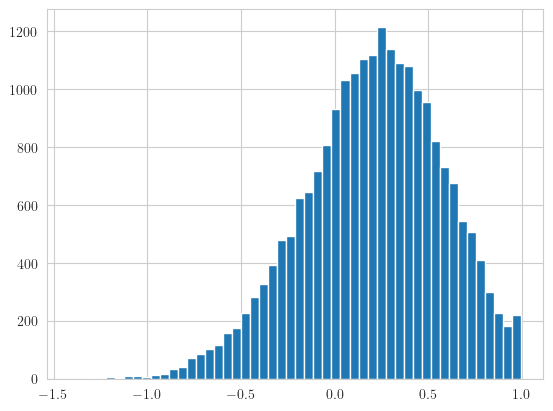

In [33]:
plt.hist(orcmanl.orcs, bins=50)